# Two Dimentional Vision System Examples

In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline
import csv
import networkx as nx
import networkx as nx
from matplotlib import pyplot, patches



In [2]:
G = nx.DiGraph()
with open("ffbo_connectivity.csv", "rb") as f:
    reader = csv.reader(f, delimiter=",")
    for i, line in enumerate(reader):
        if i ==0: 
            print 'line[{}] = {}'.format(i, line)
        else:
            #print 'line[{}] = {}'.format(i, line)
            pre = line[0]
            post = line[1]
            w = line[2]
            if pre not in G.nodes(): G.add_node(pre)
            if post not in G.nodes(): G.add_node(post)
            try:
                if int(w) != 0:
                    G.add_edge(pre,post,weight=int(w))
            except:
                print "Failed on %s %s %s " % (pre,post,w)

nx.write_gexf(G, "vision_network.gexf")
           

line[0] = ['PreSynaptic Neuron', 'PostSynaptic Neuron', 'N', 'Inferred']
Failed on L5-D Tm23_24 undefined 
Failed on Tm5Y-Q Tm23_24 undefined 
Failed on Mi22-1 Tm23_24 undefined 
Failed on Tm2-D Tm23_24 undefined 
Failed on Dm3x-0 Tm23_24 undefined 
Failed on Tm20-C Tm23_24 undefined 
Failed on Tm5Y-C Tm23_24 undefined 
Failed on Tm8_like Tm23_24 undefined 
Failed on Tm23_24 Tm25_Y1-home undefined 
Failed on Tm23_24 TmY3-P undefined 
Failed on Tm23_24 Y3_Y6-4 undefined 
Failed on Tm23_24 Tm8_like undefined 
Failed on Tm23_24 TmY3-home undefined 
Failed on Tm23_24 TmY10_like-0 undefined 
Failed on Tm23_24 TmY3-B undefined 
Failed on Tm23_24 C2-C undefined 
Failed on Tm23_24 Tm5Y-C undefined 
Failed on Tm23_24 Tm4-C undefined 
Failed on Tm23_24 Tm5a-C undefined 
Failed on Tm23_24 TmY3-F undefined 
Failed on TmY13_like-0 Tm23_24 undefined 
Failed on Tm5c-0 Tm23_24 undefined 
Failed on Y3_Y6-2 Tm23_24 undefined 
Failed on T3-B Tm23_24 undefined 
Failed on T3-K Tm23_24 undefined 
Failed on 

In [3]:

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

In [4]:
import math 
def hex_points(center=(0,0), r=1):
    cx = center[0]
    cy = center[0]


    names =['home', 'A',  'B', 'C', 'D', 'E',  'F',  'J',   'K'   ,'L'   ,'P'   ,'Q'   ,'R']
    angles =       [ 0,   60,  120, 180, 240,  300,  90,    120,   150,   270,   300,   330 ] 
    rmulti =       [ 1,    1,    1,  1,   1,    1,    2,     2,     2,     2,     2,      2]
    points = np.zeros((2,len(names)))
    points[0,0] = cx
    points[1,0] = cy
    
    angles = [a* (math.pi/180) for a in angles] 
    for  i,a in enumerate(angles):
        points[0,i+1] = cx + ((r * rmulti[i]) *  math.cos(a))
        points[1,i+1] = cy + ((r * rmulti[i]) *math.sin(a))
        
    return points,names


def extract_data(image,scale,center,r):
    """image : a 2D pixel array """
    px,py = image.shape
    points,names = hex_points(center,r)
    
    pxs = (np.array(image.shape).reshape((2,1))* points).astype(int)
    
    data = np.array([image[c[0],c[1]] for c in pxs.T ])

    return pxs,data.T,names

def generate_image(reps=10,width=100,offset=0):
    x = np.sin(offset+(np.linspace((reps/2)*-np.pi, (reps/2)*np.pi, width)))
    x = np.vstack([x for i in np.arange(x.shape[0])])
    return x    




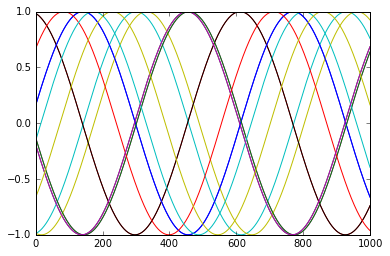

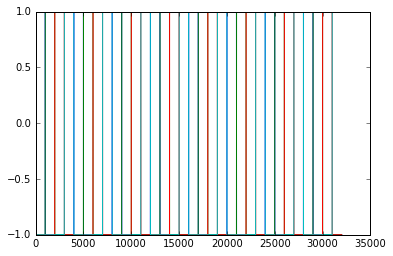

In [5]:
# generate input data

ds = []
offset = []
s = []

for count in np.arange(0,8):
    
    for m in np.arange(0,10,0.01):
        dir_s = 1
        h = generate_image(offset = m).T
        _,d,_ = extract_data(h,(1,1),(0.5,0.5),0.1)
        ds.append(d)
        s.append(dir_s)        
        offset.append(m)
        

    for m in np.arange(10,0,-0.01):
        dir_s = 2
        h = generate_image(offset = m).T
        _,d,_ = extract_data(h,(1,1),(0.5,0.5),0.1)
        ds.append(d)
        s.append(dir_s)
        offset.append(m)
        
    for m in np.arange(0,10,0.01):
        dir_s = 3
        h = generate_image(offset = m)
        _,d,_ = extract_data(h,(1,1),(0.5,0.5),0.1)
        ds.append(d)
        offset.append(m)
        s.append(dir_s)
        

    for m in np.arange(10,0,-0.01):
        dir_s = 4
        h = generate_image(offset = m)
        _,d,names = extract_data(h,(1,1),(0.5,0.5),0.1)
        ds.append(d)
        offset.append(m)
        s.append(dir_s)
    
d = np.array(ds)
#s = np.array(np.vstack([np.array(ss1),np.array(ss2)]))

class_s = s
s2 = -np.ones((len(s),4))
for i,x in enumerate(s):
    s2[i,x-1] = 1
s = s2.T

plt.plot(d[:1000,:]); plt.show()

plt.plot(s[0,:]);
plt.plot(s[1,:]); 
plt.plot(s[2,:]); 
plt.plot(s[3,:]); 
plt.show()



# generate up down motion 


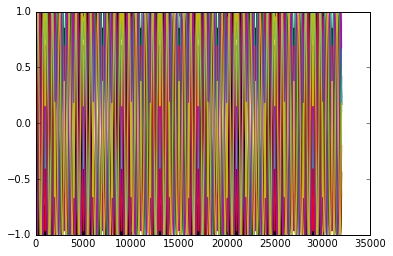

In [6]:
plt.plot(d); plt.show()

In [7]:
trainlen = 16000
future = 16000
full = trainlen + future



n_reservoir =G.number_of_nodes()

data = np.array(ds)
s = s.T
n_inputs =len(names)
matrix = nx.adjacency_matrix(G, weight='weight').todense()



# Create Input Matrix
input_matrix = np.zeros((n_reservoir, n_inputs))
for j,c in enumerate(names):
    for i,n in enumerate(G.nodes()):
        if 'L1' in n or  'L2' in n or  'L4' in n:
            if c in n:
                input_matrix[i,j] = 1
    
esn = ESN(n_inputs = n_inputs,
          n_outputs = 4,
          n_reservoir = n_reservoir,
          spectral_radius = 1.5,
          random_state=42,
          teacher_forcing=False,
          matrix=matrix,
          input_matrix = input_matrix)


#Create a list of network outputs that can be used to train upon
# We focus oon the T4 and Tm* neurons
o_nodes = np.zeros((input_matrix.shape[1],input_matrix.shape[0]))



for i,n in enumerate(G.nodes()):
    if 'Tm3' in n or 'Mi1' in n:    
        o_nodes[:,i] = 1
        

o_nodes = o_nodes[0,:].T

# Fit the network        
pred_training = esn.fit(data[:trainlen],s[:trainlen],True,o_nodes)

# Generate Output
prediction = esn.predict(data[trainlen:trainlen+future])

plt.figure(figsize=(11,1.5))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="data")


plt.plot(range(trainlen,trainlen+future),prediction, label="free running ESN")
plt.plot(s[1:trainlen+future],'g',label="output")

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')

Using Matrix
Using Input Matrix


IndexError: index 19 is out of bounds for axis 0 with size 13

In [ ]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline



esn = ESN(n_inputs = len(names),
          n_outputs = 4,
          n_reservoir = 1000,
          spectral_radius = 1.5,
          random_state=42,
          noise = 0.001,
                   teacher_forcing=False)


pred_training = esn.fit(data[:trainlen],s[:trainlen])

prediction = esn.predict(data[trainlen:trainlen+future])
#print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(11,1.5))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="data")
plt.plot(s[1:trainlen+future],'g',label="output")

plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')

In [ ]:
plt.plot(prediction[:,0],0.1+np.array(class_s[-16000:]),'x');
plt.plot(prediction[:,1],0.2+np.array(class_s[-16000:]),'x');
plt.plot(prediction[:,2],0.3+np.array(class_s[-16000:]),'x');
plt.plot(prediction[:,3],0.4+np.array(class_s[-16000:]),'x');
#plt.plot(prediction[:,2],prediction[:,3],'x');

In [ ]:
plt.plot(prediction[:,2]);
plt.plot(prediction[:,3]);

In [ ]:
plt.plot(sum(d.T)[:1000])
plt.plot(sum(d.T)[1000:2000])
plt.plot(sum(d.T)[2000:3000])
plt.plot(sum(d.T)[3000:4000])


In [ ]:
plt.plot(sum(prediction.T)[:1000])
plt.plot(sum(prediction.T)[1000:2000])
plt.plot(sum(prediction.T)[2000:3000])
plt.plot(sum(prediction.T)[3000:4000])


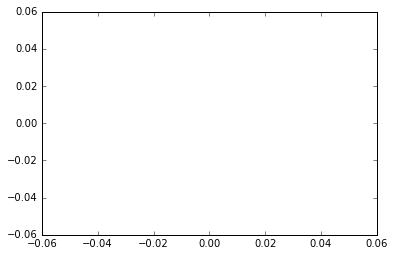

In [33]:
plt.plot(xs = np.arange(0,len(class_s)/2),ys=prediction)
plt.show()

IndexError: index 16000 is out of bounds for axis 0 with size 16000

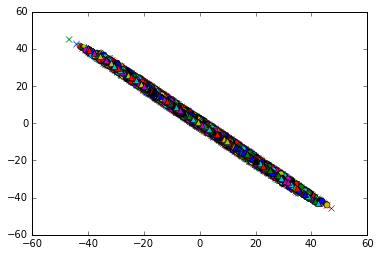

In [70]:
marks = ['x','o','.','^']
for i,s in enumerate(class_s):
    plt.plot(prediction[i,2],prediction[i,3],marks[s-1] )
plt.show()

In [35]:
xs = np.arange(0,len(class_s))
ys=prediction
ys

array([[ 0.88826133, -0.91305148, -1.24586407, -0.94112076],
       [ 1.17422848, -1.49551639, -1.18125169, -0.86397172],
       [ 0.98401567, -0.68510752, -0.41436294, -1.32623961],
       ...,
       [ 0.01811551, -0.19216408,  0.08095945, -0.04180731],
       [-0.2558261 , -0.06400717, -0.11276039, -0.06426316],
       [-0.11679825,  0.0857335 ,  0.32746662, -0.18583771]])

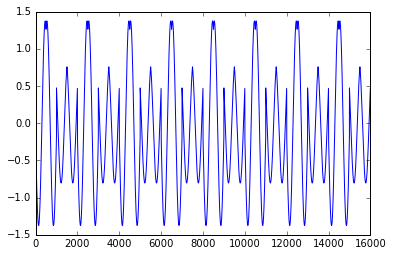

In [38]:
plt.plot(sum(d.T)); plt.show()

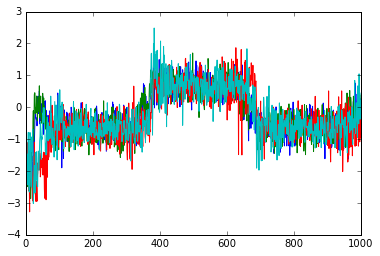

In [36]:
plt.plot(sum(prediction.T)[:1000])
plt.plot(sum(prediction.T)[1000:2000])
plt.plot(sum(prediction.T)[2000:3000])
plt.plot(sum(prediction.T)[3000:4000])


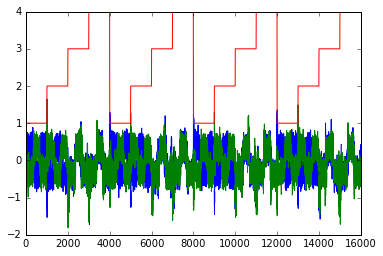

In [44]:
plt.plot(prediction[:,0])
plt.plot(prediction[:,1])
plt.plot(class_s[-16000:])

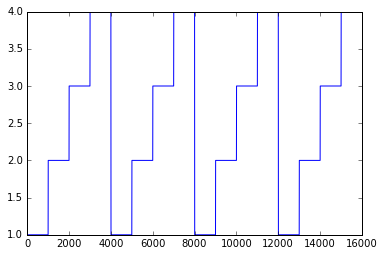

In [52]:
for n in G.nodes():
    if 'L1' in n:
        print n

L1-home
L1-R
L1-P
L1-Q
L1-B
L1-C
L1-A
L1-F
L1-D
L1-E
L1-J
L1-K
L1-L


In [87]:
x =s_orig[-16000:]
y = prediction[:,0]
fit = np.polyfit(x,y,3)
y_new = np.polyval(fit,x)
#plt.plot(x,y,'b-')


fig = plt.figure()
fig.suptitle('Motion Selectivity in the Visual System', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('T4 Up/Down Direction Selectivity')

ax.set_xlabel('dX')
ax.set_ylabel('T4 response')

ax.plot(x,y_new,'g-')


y = prediction[:,1]
fit = np.polyfit(x,y,3)
y_new = np.polyval(fit,x)
#plt.plot(x,y,'g-')
ax.plot(x,y_new,'b-')

plt.show()

TypeError: expected x and y to have same length

In [88]:
s_orig.shape

(8000,)